# NYPD Civilian Complaints

# Summary of Findings

### Introduction

This dataset contains 33,358 records with 27 attributes of civilian complains filed against New York City police officers ranged from Septemer 1985 to January 2020. All the records are closed cases which are reviewed and also provided by the New York City’s Civilian Complaint Review Board. All the police officers in this dataset are still on the force as of late June 2020 who had at least one substantiated allegation against them. This dataset includes some basic information about the police officers and complainants for example ethinicity, gender and position; it also includes information about complains themselves like time and the type of the complains ("fado_type" and "allegation") as well as the reviewd result ("board_disposition"). 
<br>
<br>
The question we are investigating is $\textbf{After getting at least one substantiated allegation,}$ 
$\textbf{does the promotion depend on the ethnicity of the police officers?}$  The information related to our quesiton the most is the ethinicity of the police officers, the reviewd result of the complains, and whether the police get promoted (measured by the change in their rank) after having a substantiated allegation. 

### Cleaning and EDA


#### 1. Replacing the values that should be NaN.
<br>
After checking the unique values for all the columns, we find that 'complainant_ethnicity','complainant_gender', 'complainant_age_incident', 'precinct' all have values that should be NaN. These values might be "Unknown", "Refused", "Not described", or numbers that are not valid. One thing to notice is that the column "shield_no" which represents the shield number of the police officers also contains number that are not valid for a shield number. However, since it's hard to find the exact valid range for NYPD shield number and this columns is not related to our question, we choose to leave the column as what it is.

#### 2. Adding columns that are suitable for investing our question
<br>
As mentioned in the introdution, the information related to our quesiton the most is the ethinicity of the police officers, the reviewd result of the complains, and whether the police get promoted (measured by the change in their rank) after having a substantiated allegation.  
<br>
<br>
- For the reviewd result of the complains, the column "board_disposition" have values "Unsubstantiated", "Exonerated", and different types of "Substantiated". To integrate the substantiated cases, we add a new columns "Result_ues" to categorize the result as "Unsubstantiated", "Exonerated", and "Substantiated". Since we only need to analyze the result of the "Substantiated" cases, we add a new columns "Result" to split the values as "Substantiated" and "Not substantiated". 
<br>
<br>
- For the promotion of the police officers, we assign a int for different positions listed in columns "rank_abbrev_incident" and "rank_abbrev_now" according to the appendix "CCRB Data Layout Table". There are some ambiguous in the rank like the difference between "SSA/Sergeant Special Assignment" and "SDS/Sergeant Detective Squad" is unclear and we cannot find any explaination online. Checking on the result of the dataset, most of the police officers who have a "SDS" as current rank had a "SSA" in the past. Since most of the police officers are still promoted instead of demotion, we assign the "SDS" with a higher rank number compares to "SSA". In addtion, two abbreviation "DET" and "CCC" are not present in the appendix. After some online search, we conclude that "DET" is an old police rank used by NYPD representing "Detective" which is not in the present polic rank. Since we could not find the corresponding rank as this rank is splited into thre grades - DT3, DT2, DT1, we just assign it as DT1. The abbreviation "CCC" is only used by one police officer who is the Chief of Crime Control Strategies. Thus, we assign it with the same rank number as all the other chiefs. In a word, all chiefs are labeled level 21(the same level). In addition, we add another columns "promoted" to show whether the police officer get promoted as "True" and "False".
<br>
<br>
$\ast$ Overall, the rank numbers we assign to the ranks have some ambiguity and it might affect the result of the analysis of our hypothesis test. However, as the police officers who have vague promotion status are not significant in number, we do not expect the influence on our analysis will be huge.

#### 3. Univariate Analysis
Specific to this question, we've plot 
- the distribution of the officers' ethinicity as "Hispanic", "White", "Black", "Asian" and "American Indian".
- the distribution of review result as "Substantiated", "Unsubstantiated", and "Exonerated"
- the distribution of review result as "Substantiated" and "Not substantiated" ("Unsubstantiated" and "Exonerated" combined)
- the distribution of the promotion status

#### 4. Bivariate Analysis
Specific to this question, we've plot
- the pivot table of officers' ethinicity vs rank_abbrev_incident (rank abbreviation when the complains took place)
- the pivot table of officers' ethinicity vs rank_abbrev_now (current rank abbreviation)
- the distribution of the review result (3 categories) with respect to the ethinicity of officers 
- the distribution of the review results (2 categories) with respect to ethnicity of officers
- the distribution of the officer ethnicity with respect to promotion status for all cases
- the distribution of the officer ethnicity with respect to promotion status for substantiated cases

#### 5. Interesting Aggregation
Each row of the original dataset represents a complaint. However, many of the officers have more than one reported complaints. Since we are investigating with the unit of police officers, we have to aggregate the dataset into each police officers by their unique_mos_id. Then, if an officer have got a promotion after at least one substantiated allegation, the officer's promotion_status is marked as True, and vise versa. Then, we could explore the dependency of promotion on ethnicity of officers after having a substantiated record.

### Assessment of Missingness


* We looked at all the columns with missing values at first, and try to decide which ones might be NMAR.
  - We think the outcome description is NMAR because it is not likely to be dependent on other observed columns and complainants might be less likely to report their case outcome since it might reduce their credential if they are arrested in the end. Additional data to obtain that could explain missingness make it MAR: whether the complainant ended up in jail, since being in jail implies that they are arrested and thus might be less likely to include it
 
 
* We then wrote a function MAR to calculate the p-value between the missingness of precinct with values of other columns.
  - We set the cutoff of significant p-value to be 0.05, since it is the convention of a lot of scientific papers and it keeps type I error small.
  - We are trying to use permutation test to see if the distribution of the missing values of outcome_description is statistically "similar enough" across different categories of the input column. If so, then the missingness of outcome_description is not dependent on that column.
  - We found that the p-value between missingness of outcome_description and 'mos_gender' is 0.073, meaning that, in 1000 trials, 7.3% of the time, with random permutation, we see a tvd at least as extreme as the observed one, meaning the distribuion of missingness is relatively "similar enough" between categories of mos_gender. Outcome_description missingness is not dependent on mos_gender. 
  - We found that the p-value between missingness of outcome_description and 'year_received' is 0.0, meaning that in 1000 trials of permutation, 0.0% of the time we see a tvd at least as extreme as the observed one, meaning the distribuion of missingness is not similar at all between categories of 'year_received'. Outcome_description missingness is dependent on 'year_received'. 


* We are not directly using "outcome_description", "year_received", or "mos_gender" columns in our analysis, thus the missingness should not affect our investigation greatly. (All of our used columns do not have missing values) However, we can reason that 'outcome_description' is dependent on 'year_received' because the older reports tend not to have a lot of details, and it is independent with mos_gender because the missingness is not related to the gender of police officer.

### Hypothesis Test

* Null hypothesis: After getting at least one substantiated allegation, the promotion does not depend on the ethnicity of the police officers.
* Alternative hypothesis: After getting at least one substantiated allegation, the promotion depends on the ethnicity of the police officers.


* Our test statistics: Total Variation Distance of promotion rate between five categories of officers: 'Hispanic', 'White', 'Black', 'Asian', and 'American Indian'. The reason why we chose permutation test is because we are comparing two distinct distributions: promoted vs not promoted. We choose TVD because the ethnicity of police officers is categorical. 
* We use a significance level of 0.05 because it is commonly used in academia and there is no specific reason for us to lower the level or set it higher.


* We are only using the substantiated case here since we do not count a promotion before a substantiated allegation as a promotion here.
* The procedure of the permutation test is that we firstly get the observed statistics of the original dataset, then we shuffle the promotion status (True/False) for 1000 times and get the test statistics (TVD) for each simulation.


* The resulting p-value we get from permutation test is 0.0, meaning over 1000 trials of random shuffling, 0.0% of the tvd is the same or more extreme as the observed one. It means the observed TVD is significantly big and we reject the null hypothesis. The intepretation of this result is that after getting at least one substantiated allegation, the prmotion depends on the ethnicity of the police officers.

# Code

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [83]:
nypd = pd.read_csv('allegations_202007271729.csv')
nypd.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [84]:
nypd["mos_ethnicity"].unique()

array(['Hispanic', 'White', 'Black', 'Asian', 'American Indian'],
      dtype=object)

### Cleaning and EDA

#### 1. Replacing values with NaN when appropriated
- "complainant_ethinicity" has values "Unknown" and "Refused"
- "complainant_gender" has value "Not described"
- we consider negative value (impossible) and value under 6 (not likely since the children are too young) for "complainant_age_incident" as invalid
- for the numbers appeared in the dataset, 0 and 1000 are invalid precinct numbers

In [85]:
# replacing values in 'complainant_ethnicity','complainant_gender', 'complainant_age_incident', 'precinct'
replaced = nypd.copy()
replaced['complainant_ethnicity'] = replaced['complainant_ethnicity'].replace(['Unknown', 'Refused'], np.nan)
replaced['complainant_gender'] = replaced['complainant_gender'].replace(['Not described'], np.nan)
replaced['complainant_age_incident'] = replaced['complainant_age_incident'].apply(lambda x: np.nan if x < 6 else x)
replaced['precinct'] = replaced['precinct'].apply(lambda x: np.nan if x == 1000 or x == 0 else x)

In [86]:
replaced.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


#### 2. Adding columns that are suitable for investing our question
- "Result_ues" for categorizing "board_disposition" into three categories "Unsubstantiated", "Exonerated", and "Substantiated"
- "Result_ues" for categorizing "board_disposition" into two categories "Not substantiated", "Substantiated"
- "mos_ethnicity_w/nw" for categorizing "mos_ethnicity" into two categories "white", "non-white"

In [87]:
replaced["Result_ues"] = np.where(replaced["board_disposition"] == "Exonerated", "Exonerated", 
                            np.where(replaced["board_disposition"] == "Unsubstantiated", "Unsubstantiated", 
                         "Substantiated"))
replaced["Result"] = np.where(replaced["board_disposition"] == "Exonerated", "Not substantiated", 
                            np.where(replaced["board_disposition"] == "Unsubstantiated", "Not substantiated", 
                         "Substantiated"))
replaced.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,Result_ues,Result
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Substantiated,Substantiated
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),Substantiated,Substantiated
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),Substantiated,Substantiated
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),Substantiated,Substantiated
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),Substantiated,Substantiated


- assigning rank numbers to "rank_abbrev_incident" and "rank_abbrev_now" as "rank_incident_num"	and "rank_now_num"

In [88]:
# helper function for assigning rank numbers
def rank_to_number(rank):
    """
    A helper function to convert the rank of each officer for comparison
    """
    if rank == 'POM' or rank == 'POF' or rank == 'PO':
        return 1
    if rank == 'PSA':
        return 2
    if rank == 'DT3':
        return 3
    if rank == 'DT2':
        return 4
    if rank == 'DT1':
        return 5
    if rank == 'DET':
        return 5
    if rank == 'DTS':
        return 6
    if rank == 'SGT':
        return 7
    if rank == 'SSA':
        return 8
    if rank == 'SDS':
        return 9
    if rank == 'LT':
        return 10
    if rank == 'LSA':
        return 11
    if rank == 'LCD':
        return 12
    if rank == 'CPT':
        return 13
    if rank == 'SRG':
        return 14
    if rank == 'SCS':
        return 15
    if rank == 'DCS':
        return 16
    if rank == 'DI':
        return 17
    if rank == 'INS':
        return 18
    if rank == 'DC':
        return 19
    if rank == 'AC':
        return 20
    if (rank == 'COD' or rank == 'CCA' or rank == 'CCT' or rank == 'CD' or rank == 'CMS' or rank == 'COH'
    or rank == 'COI' or rank == 'COP' or rank == 'COD' or rank == 'COS' or rank == 'COT' or rank == 'CPB'
    or rank == 'CCC'):
        return 21

In [89]:
# apply the helper function to the dataset
replaced['rank_incident_num'] = replaced['rank_abbrev_incident'].apply(rank_to_number)
replaced['rank_now_num'] = replaced['rank_abbrev_now'].apply(rank_to_number)
replaced.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,Result_ues,Result,rank_incident_num,rank_now_num
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Substantiated,Substantiated,1,1
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),Substantiated,Substantiated,1,1
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),Substantiated,Substantiated,1,1
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),Substantiated,Substantiated,1,1
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),Substantiated,Substantiated,1,1


- "promotion_status" to represent whether the police officer in this case is promoted after the complains took place.
    - "True" for promotion (rank number for "rank_abbrev_now" is higher than "rank__abbrev_incident"); 
    - "False" for unchanged or demotion (rank number for "rank_abbrev_now" is lower than or equal to "rank__abbrev_incident")

In [90]:
# first get the difference between current rank and incident rank
# the officer is promoted if the difference is larger than 0
replaced["promotion_status"] = replaced["rank_now_num"] - replaced["rank_incident_num"]
replaced["promotion_status"] = replaced["promotion_status"] > 0
replaced.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,allegation,precinct,contact_reason,outcome_description,board_disposition,Result_ues,Result,rank_incident_num,rank_now_num,promotion_status
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Substantiated,Substantiated,1,1,False
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),Substantiated,Substantiated,1,1,False
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),Substantiated,Substantiated,1,1,False
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),Substantiated,Substantiated,1,1,False
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),Substantiated,Substantiated,1,1,False


#### 3. Univariate Analysis

- the distribution of the officers' ethinicity as it was originally categorized, i.e. "Hispanic", "White", "Black", "Asian", "American Indian".


In [91]:
# the number of cases for each category of police officers' ethnicity
replaced["mos_ethnicity"].value_counts().to_frame()

,mos_ethnicity
White,18074
Hispanic,9150
Black,4924
Asian,1178
American Indian,32


[Text(0.5, 1.0, 'Distribution of the ethnicity of the police officer')]

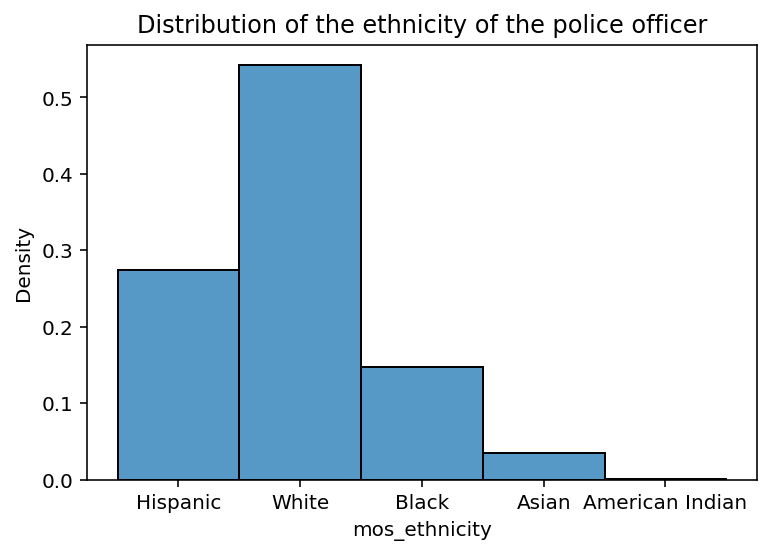

In [92]:
plot_1 = sns.histplot(data=replaced, x="mos_ethnicity", stat="density")
plot_1.set(title = "Distribution of the ethnicity of the police officer")

- the distribution of reviewed result as "Substantiated", "Unsubstantiated", and "Exonerated"


In [93]:
# the number of cases for each category of reviewed result with 3 categories
replaced["Result_ues"].value_counts().to_frame()

,Result_ues
Unsubstantiated,15448
Exonerated,9609
Substantiated,8301


[Text(0.5, 1.0, 'Distribution of the reviewed result (3 categories)')]

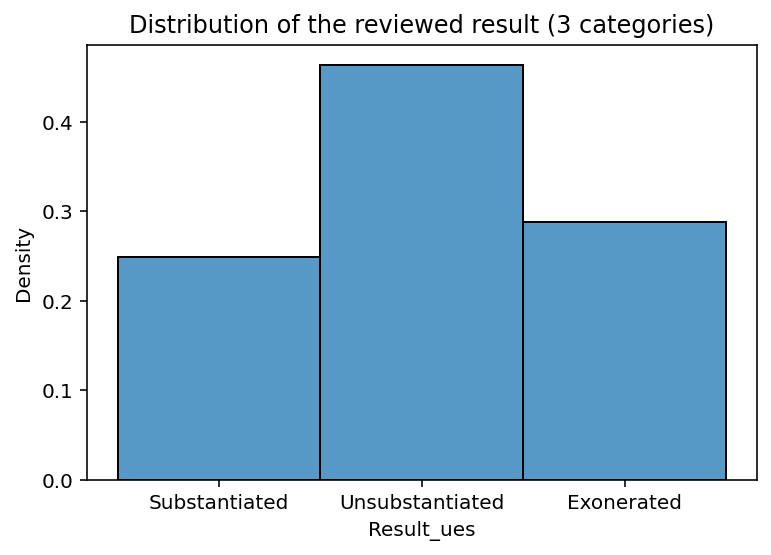

In [94]:
plot_3 = sns.histplot(data=replaced, x="Result_ues", stat="density")
plot_3.set(title = "Distribution of the reviewed result (3 categories)")

- the distribution of review result as "Substantiated" and "Not substantiated" ("Unsubstantiated" and "Exonerated" combined)

In [95]:
# the number of cases for each category of reviewed result with 2 categories
replaced["Result"].value_counts().to_frame()

,Result
Not substantiated,25057
Substantiated,8301


[Text(0.5, 1.0, 'Distribution of the reviewed result (2 categories)')]

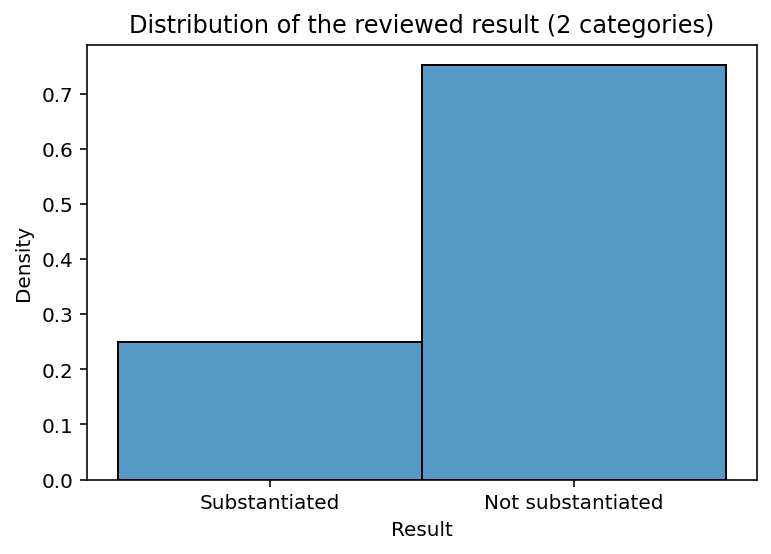

In [96]:
plot_4 = sns.histplot(data=replaced, x="Result", stat="density")
plot_4.set(title = "Distribution of the reviewed result (2 categories)")

- the distribution of the promotion status

In [97]:
# the number of cases for each category of the promotion status
replaced["promotion_status"].value_counts().to_frame()

,promotion_status
True,17218
False,16140


[Text(0.5, 1.0, 'Distribution of the promotion status')]

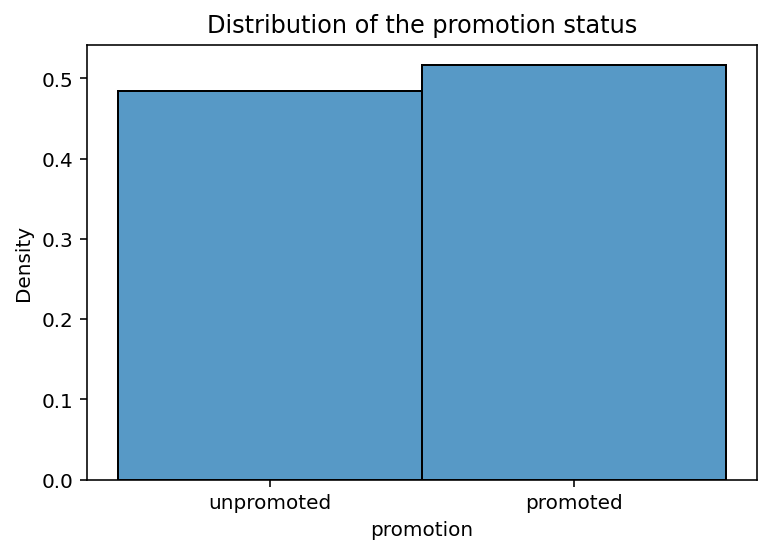

In [98]:
# assign a variable "promotion" since the column "promotion_status" is an boolean array which is hard to draw histogram
replaced["promotion"] = np.where(replaced["promotion_status"] == True, "promoted", "unpromoted")
plot_5 = sns.histplot(replaced["promotion"], stat="density")
plot_5.set(title = "Distribution of the promotion status")

#### 4. Bivariate Analysis

- the pivot table of officers' ethinicity vs rank_abbrev_incident (rank abbreviation when the complains took place)



In [99]:
# number of cases in diffrent rank (when incident took place) with respect to ethnicity
incident_rank = replaced.groupby(['mos_ethnicity', 'rank_abbrev_incident'], as_index = False).count()
incident_rank = incident_rank[['mos_ethnicity','rank_abbrev_incident','unique_mos_id']]
inci_pt = incident_rank.pivot_table(index = 'mos_ethnicity', columns = 'rank_abbrev_incident', values="unique_mos_id")
inci_pt


rank_abbrev_incident,CPT,DC,DET,DI,DT1,DT2,DT3,DTS,INS,LCD,LSA,LT,PO,POF,POM,SDS,SGT,SSA
mos_ethnicity,,,,,,,,,,,,,,,,,,
American Indian,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN
Asian,NaN,NaN,NaN,5.0,2.0,13.0,58.0,1.0,NaN,NaN,NaN,28.0,10.0,33.0,763.0,26.0,239.0,NaN
Black,6.0,1.0,18.0,8.0,3.0,16.0,460.0,79.0,2.0,NaN,NaN,58.0,165.0,313.0,2988.0,7.0,784.0,16.0
Hispanic,49.0,NaN,6.0,9.0,6.0,50.0,711.0,72.0,NaN,NaN,1.0,208.0,185.0,705.0,5845.0,10.0,1285.0,8.0
White,127.0,1.0,26.0,74.0,9.0,109.0,1476.0,178.0,25.0,13.0,23.0,970.0,944.0,347.0,10193.0,85.0,3393.0,81.0


- the pivot table of officers' ethinicity vs rank_abbrev_now (current rank abbreviation)


In [100]:
# number of cases in diffrent rank (current rank) with respect to ethnicity
now_rank = replaced.groupby(['mos_ethnicity', 'rank_abbrev_now'], as_index = False).count()
now_rank = now_rank[['mos_ethnicity','rank_abbrev_now','unique_mos_id']]
now_pt = now_rank.pivot_table( index = 'mos_ethnicity', columns = 'rank_abbrev_now', values="unique_mos_id")
now_pt

rank_abbrev_now,AC,CCC,CD,COI,CPT,DC,DI,DT1,DT2,DT3,DTS,INS,LCD,LSA,LT,POF,POM,SDS,SGT,SSA
mos_ethnicity,,,,,,,,,,,,,,,,,,,,
American Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
Asian,NaN,NaN,NaN,NaN,42.0,NaN,1.0,33.0,9.0,182.0,20.0,19.0,NaN,NaN,78.0,15.0,420.0,70.0,289.0,NaN
Black,21.0,NaN,19.0,NaN,38.0,19.0,43.0,81.0,122.0,1205.0,276.0,5.0,31.0,13.0,394.0,210.0,1419.0,178.0,808.0,42.0
Hispanic,NaN,NaN,NaN,NaN,182.0,16.0,87.0,106.0,228.0,2175.0,361.0,22.0,98.0,33.0,672.0,426.0,2949.0,150.0,1554.0,91.0
White,76.0,19.0,NaN,14.0,473.0,128.0,304.0,475.0,699.0,3276.0,639.0,168.0,543.0,163.0,1671.0,193.0,4664.0,830.0,3416.0,323.0


- the distribution of the review result with respect to the ethinicity of officers


[Text(0.5, 1.0, 'Distribution of the review results (3 categories) with respect to ethnicity')]

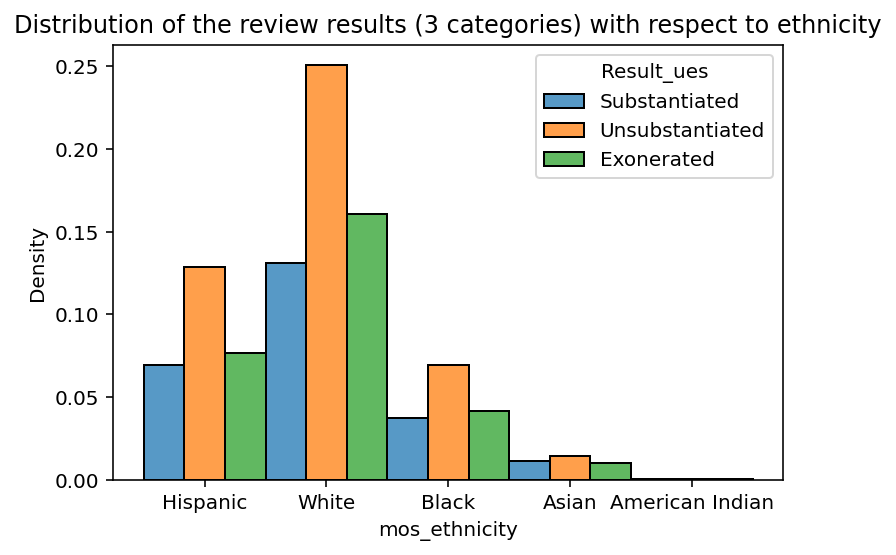

In [119]:
plot_6 = sns.histplot(data=replaced, x = "mos_ethnicity", hue="Result_ues", multiple="dodge", stat="density")
plot_6.set(title="Distribution of the review results (3 categories) with respect to ethnicity")

[Text(0.5, 1.0, 'Distribution of the review results (2 categories) with respect to ethnicity')]

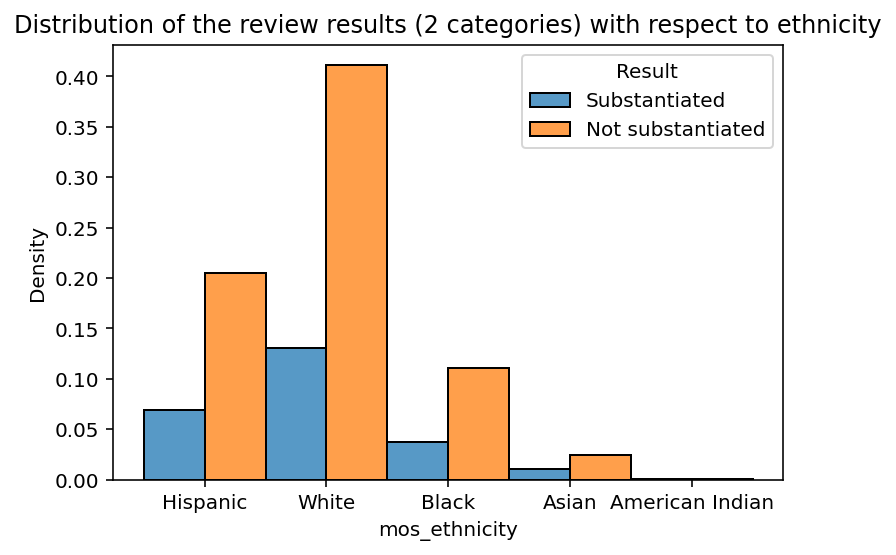

In [120]:
plot_7 = sns.histplot(data=replaced, x = "mos_ethnicity", hue="Result", multiple="dodge", stat="density")
plot_7.set(title="Distribution of the review results (2 categories) with respect to ethnicity")

* Distribution of the officer ethnicity with respect to promotion status for all cases

[Text(0.5, 1.0, 'Distribution of the officer ethnicity with respect to promotion status for substantiated cases')]

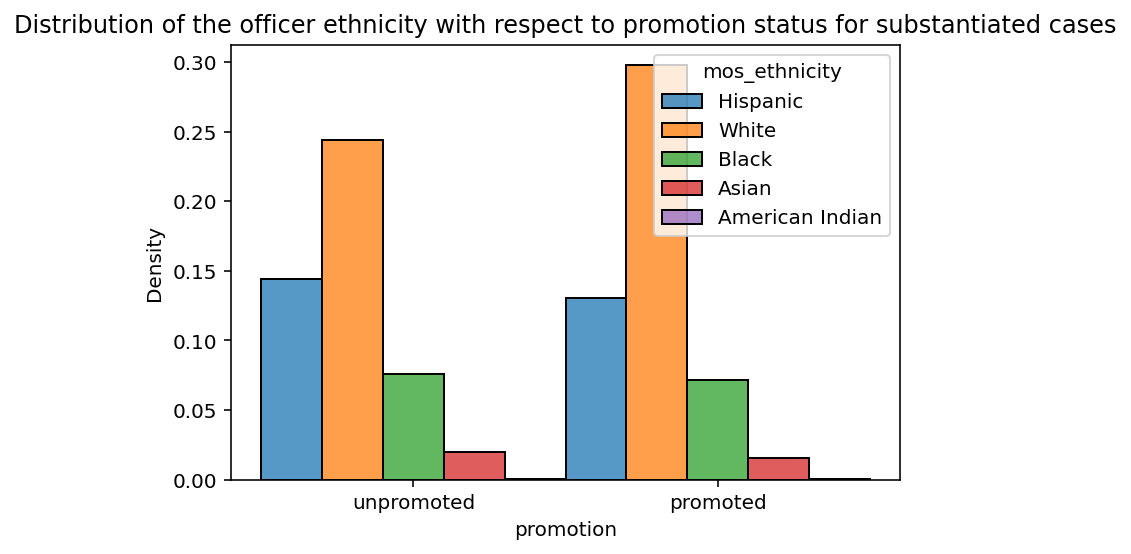

In [121]:
plot_10 = sns.histplot(data=replaced, x = "promotion", hue="mos_ethnicity",multiple="dodge",stat="density")
plot_10.set(title="Distribution of the officer ethnicity with respect to promotion status for substantiated cases")

* Distribution of the officer ethnicity with respect to promotion status for substantiated cases

In [122]:
substantiated = replaced[replaced["Result"] == "Substantiated"]

[Text(0.5, 1.0, 'Distribution of the officer ethnicity with respect to promotion status for substantiated cases')]

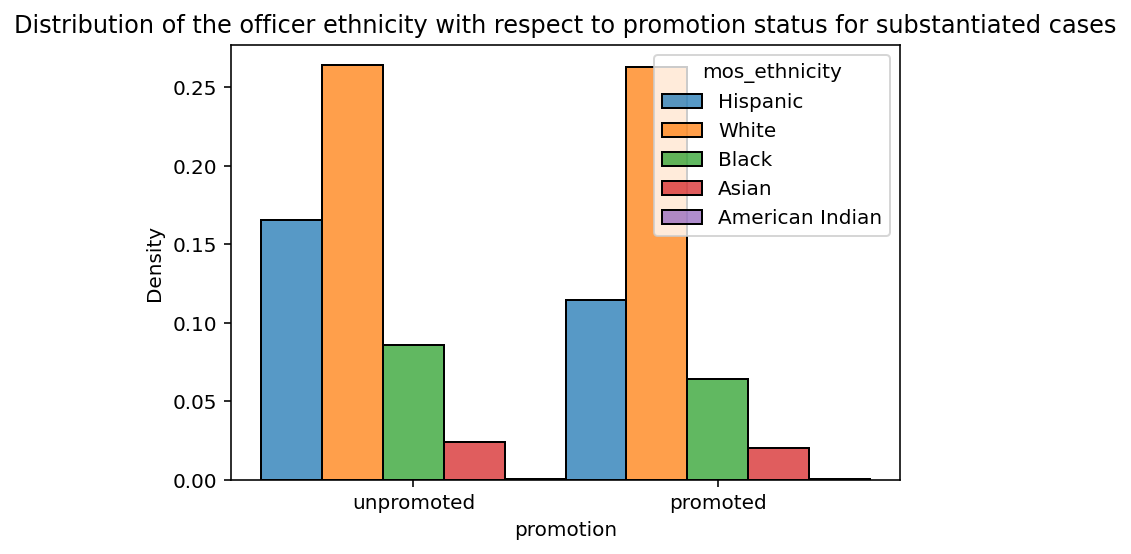

In [123]:
plot_8_6 = sns.histplot(data=substantiated, x = "promotion", hue="mos_ethnicity",multiple="dodge",stat="density")
plot_8_6.set(title="Distribution of the officer ethnicity with respect to promotion status for substantiated cases")

#### 5. Interesting Aggregation

* Use the dataset with only substantiated cases which is more relevant to our question
* Aggregate on unique_mos_id to get the statistics in officers instead of complaints

In [103]:
# Look at the statistics of substantiated cases only
a_ethn_promo_s = substantiated[["unique_mos_id", "mos_ethnicity", "promotion_status"]]
a_ethn_promo_s = a_ethn_promo_s.groupby(['unique_mos_id',"mos_ethnicity"], 
                    as_index = False).aggregate(lambda x: True if x.sum() > 0 else False)
a_ethn_promo_s["promotion"] = np.where(a_ethn_promo_s["promotion_status"] == True, "promoted", "unpromoted")
a_ethn_promo_s

,unique_mos_id,mos_ethnicity,promotion_status,promotion
0,2,Hispanic,True,promoted
1,5,Hispanic,False,unpromoted
2,11,White,True,promoted
3,21,White,False,unpromoted
4,23,White,False,unpromoted
...,...,...,...,...
3991,36301,Hispanic,False,unpromoted
3992,36305,Hispanic,False,unpromoted
3993,36317,Hispanic,True,promoted
3994,36339,Asian,False,unpromoted


* Generate the pivot table with two distributions: promoted (True) and unpromoted (False)

In [104]:
all_ethn = a_ethn_promo_s.pivot_table(index="promotion_status", columns="mos_ethnicity", 
                                        aggfunc="size").apply(lambda x: x/x.sum(), axis=1)
all_ethn

mos_ethnicity,American Indian,Asian,Black,Hispanic,White
promotion_status,,,,,
False,0.000895,0.052372,0.159803,0.310206,0.476723
True,0.000568,0.039160,0.136209,0.261635,0.562429


[Text(0.5, 1.0, 'Distribution of the officer ethnicity with respect to promotion status for substantiated cases')]

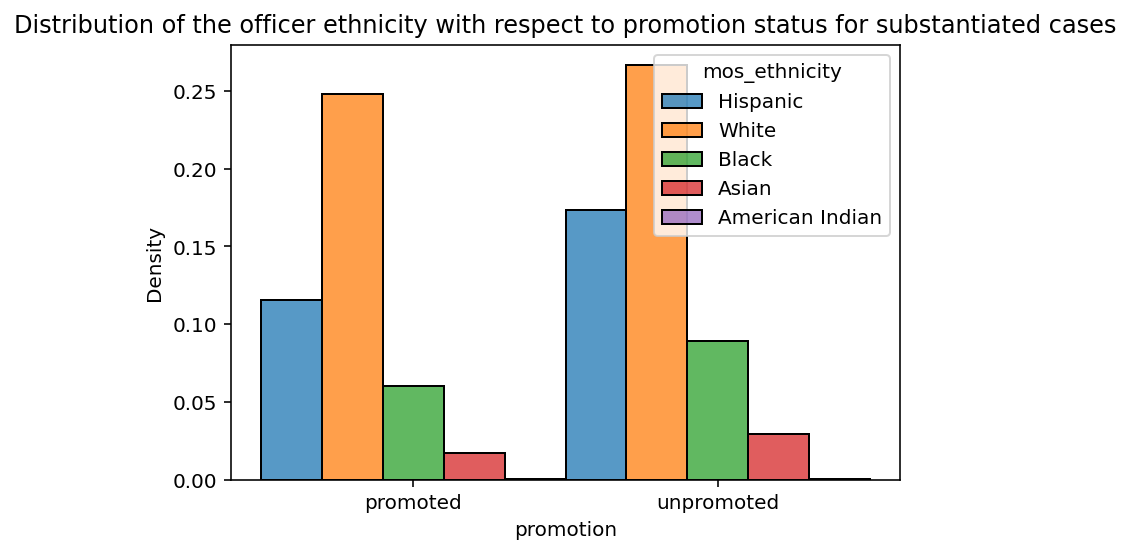

In [116]:
plot_9 = sns.histplot(data=a_ethn_promo_s, x= "promotion", hue="mos_ethnicity",multiple="dodge",stat="density")
plot_9.set(title="Distribution of the officer ethnicity with respect to promotion status for substantiated cases")

### Assessment of Missingness

* We looked at all the columns that have missing values

In [106]:
boolean = [replaced[column].isnull().sum() > 0 for column in replaced.columns]
replaced.columns[boolean]

Index(['command_at_incident', 'complainant_ethnicity', 'complainant_gender',
       'complainant_age_incident', 'allegation', 'precinct', 'contact_reason',
       'outcome_description'],
      dtype='object')

* Create a column with boolean to indicate if outcome_description is missing, for later shuffling

In [107]:
replaced['outcome_description_missing'] = replaced['outcome_description'].isnull()

* Define and use the function to use permutation to calculate the p-value of outcome_description missingness dependent on another input column

In [108]:
def MAR(df, column):
    police_miss = df.copy()
    obs_df = police_miss.pivot_table(index=["outcome_description_missing"], 
                                     columns=[column], aggfunc = "size").apply(lambda x: x/x.sum(), axis=1)
    obs = obs_df.fillna(0).diff().iloc[-1].abs().sum()/2
    print('observed_tvd:',obs)

    # permute to calculate random tvd
    tvd_total = []
    color_permu = np.column_stack([np.random.permutation(police_miss["outcome_description_missing"].values) 
                                   for i in range(1000)]).T
    for simu in color_permu:
        police_miss["outcome_description_missing"] = simu
        simu_df = police_miss.pivot_table(index=["outcome_description_missing"],
                                          columns=[column], aggfunc = "size").apply(lambda x: x/x.sum(), axis=1)
        simu_tvd = simu_df.fillna(0).diff().iloc[-1].abs().sum()/2
        tvd_total.append(simu_tvd)
        
    # Calculate proportion of permuted tvd bigger than observed
    tvd_total = pd.Series(tvd_total)        
    pval = (tvd_total >= obs).sum() / 1000
    return pval

* Look at the data with histogram to show the difference

<AxesSubplot:xlabel='mos_gender', ylabel='Density'>

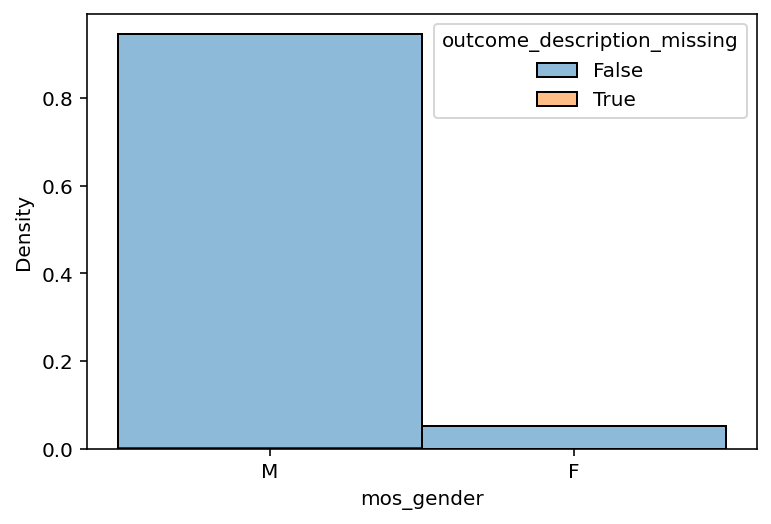

In [109]:
sns.histplot(data=replaced, x="mos_gender", hue="outcome_description_missing", stat="density")

<AxesSubplot:xlabel='year_received', ylabel='Density'>

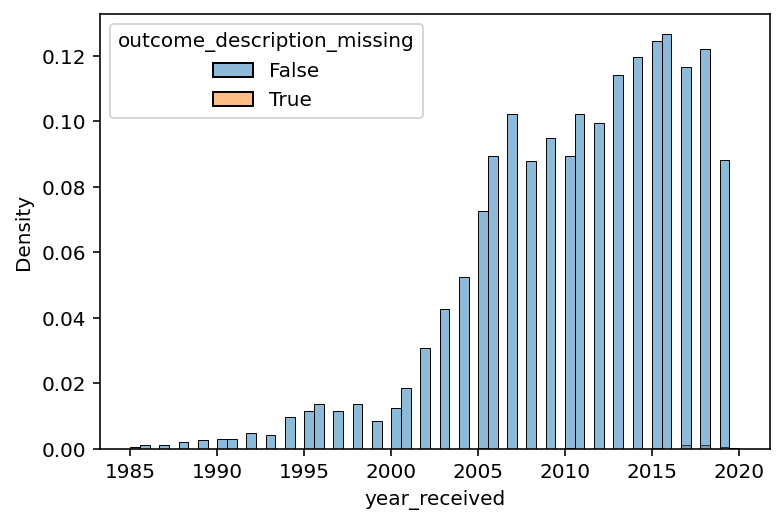

In [110]:
sns.histplot(data=replaced, x="year_received", hue="outcome_description_missing", stat="density")

* Find the pvalue of outcome_description missingness with mos_gender


In [111]:
MAR(replaced, 'mos_gender')

observed_tvd: 0.05447334780407866


0.086

* Find the pvalue of outcome_description missing with year_received


In [112]:
MAR(replaced, 'year_received')

observed_tvd: 0.695392597613185


0.0

### Hypothesis Test

* A function to calculate the p-value of the hypothesis test, print out the observed TVD, and plot out the null distribution

In [124]:
def permutation(df):
    police_miss = df.copy()
    obs_df = police_miss.pivot_table(index="promotion_status", 
                                     columns='mos_ethnicity', 
                                     aggfunc = "size").apply(lambda x: x/x.sum(), axis=1)
    obs = obs_df.fillna(0).diff().iloc[-1].abs().sum()/2
    print('observed_tvd: ', obs)

    # shuffle for null distribution
    tvd_total = []
    color_permu = np.column_stack([np.random.permutation(police_miss["promotion_status"].values)
                                   for i in range(1000)]).T
    for simu in color_permu:
        police_miss["promotion_status"] = simu
        simu_df = police_miss.pivot_table(index=["promotion_status"], 
                                          columns=['mos_ethnicity'], 
                                          aggfunc = "size").apply(lambda x: x/x.sum(), axis=1)
        simu_tvd = simu_df.fillna(0).diff().iloc[-1].abs().sum()/2
        tvd_total.append(simu_tvd)

    plt.hist(tvd_total, density = True)
    plt.axvline(x=obs, color="r")
    tvd_total = pd.Series(tvd_total)        
    pval = (tvd_total >= obs).sum() / 1000
    return pval

* Calculate the P-value
* Plot the simulated TVD and mark the observed TVD with a red line

observed_tvd:  0.08570569172940734


0.0

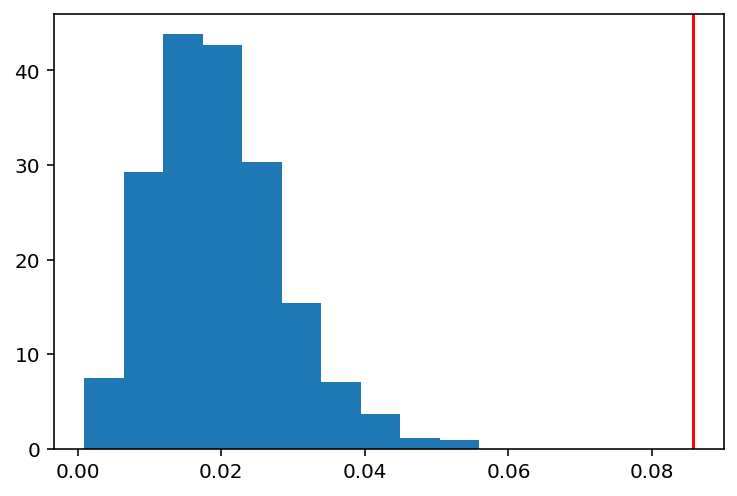

In [125]:
permutation(a_ethn_promo_s)

#### discuss uncertainty of your result and possible shortcomings of your approach.

- Uncertainty of result: 
    - we subjectively decided the level of some ranks that were not in the provided table (CCC, DET), and that might have an impact on the calculation of whether officer has been promoted
    - the distinction of some police rank are not clear in the appendix and also difficult to find online (SSA, SDS). After exploring the dataset, we subjectively decide that SDS is higher than SSA since most officers get from SSA to SDS, and we think they are likely to be promoted instead of being depromoted.



- Shortcomings: 
    - there are many factors that might affect each officer's chance of getting promoted: their own abilities, working ethics, etc. Being white or not after a substantiated report might not be the only, or the decisive, factor.

# Conclusion
We might improve our work by collecting data related to the working ethics and experiencee of each officer, thus elimininating more cofactors for promotion, also by including officers with only unsubstantiated or exonerated cases and see if they have a higher chance of getting promoted than substantiated officers.